In [85]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns



In [86]:
df = pd.read_csv('Student_Performance_Missing.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.0,Yes,4.0,2.0,23.0
9996,7.0,64.0,Yes,8.0,5.0,58.0
9997,6.0,83.0,NaN,8.0,5.0,NaN
9998,9.0,97.0,Yes,NaN,0.0,95.0


In [87]:
df.isnull().sum()


Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

In [88]:
num_cols = df.select_dtypes('number').columns
print(num_cols.tolist())

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [89]:
cat_cols = df.select_dtypes(exclude='number').columns
print(cat_cols.tolist())


['Extracurricular Activities']


In [90]:
num_imp = SimpleImputer (strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [91]:
df[num_cols]=num_imp.fit_transform(df[num_cols])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,NaN,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


In [92]:
df[cat_cols]=cat_imp.fit_transform(df[cat_cols])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,No,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

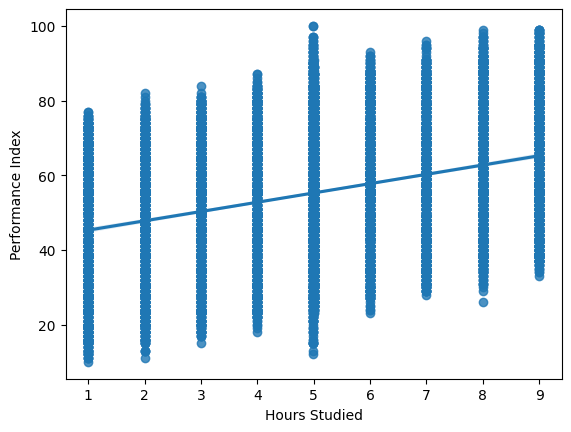

In [93]:
sns.regplot(df, x='Hours Studied' ,y= 'Performance Index')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Previous Scores'>

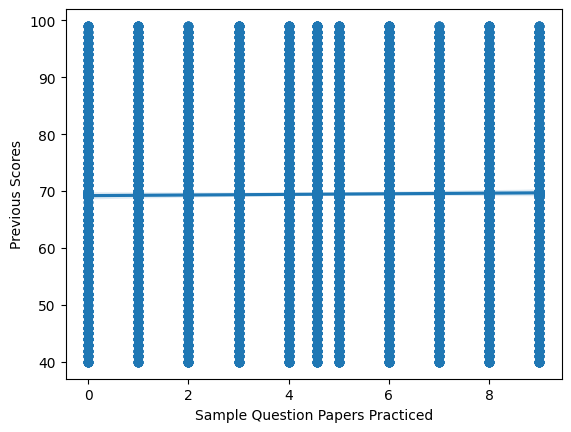

In [94]:
sns.regplot(df,x='Sample Question Papers Practiced',y='Previous Scores')


In [95]:
X= df.drop(columns=['Performance Index'])
y= df['Performance Index']

In [96]:
print(X)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.0        99.000000                        Yes     9.000000   
1               4.0        82.000000                         No     4.000000   
2               8.0        51.000000                        Yes     7.000000   
3               5.0        52.000000                        Yes     5.000000   
4               7.0        69.448995                         No     8.000000   
...             ...              ...                        ...          ...   
9995            1.0        49.000000                        Yes     4.000000   
9996            7.0        64.000000                        Yes     8.000000   
9997            6.0        83.000000                         No     8.000000   
9998            9.0        97.000000                        Yes     6.532169   
9999            7.0        74.000000                         No     6.532169   

      Sample Question Papers Practiced 

In [97]:
print(y)

0       91.000000
1       65.000000
2       45.000000
3       36.000000
4       66.000000
          ...    
9995    23.000000
9996    58.000000
9997    55.213175
9998    95.000000
9999    64.000000
Name: Performance Index, Length: 10000, dtype: float64


In [98]:
Xtrain , Xtest , ytrain ,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
cat_cols=X.select_dtypes(include=['object']).columns
num_cols=X.select_dtypes(include=['number']).columns

In [100]:
num_pipeline = Pipeline(
    steps = (
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    )
)

In [101]:
cat_pipeline = Pipeline(
    steps = (
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first'))
    )
)

In [102]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

In [103]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])

In [104]:
model.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=(('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()))),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=(('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first')))),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('lr', LinearRegression())])

In [105]:
from joblib import dump, load #dump is used to save the model and load is used to load the model 
with open('models/Multiple_linear_regression_model.joblib','rb')as f:
    dump(model, f) # dumping the model into the file
    print("Model dumped successfully")

FileNotFoundError: [Errno 2] No such file or directory: 'models/Multiple_linear_regression_model.joblib'

In [ ]:
import gradio as gr
import pandas as pd
# make a single record DataFrame
def prediction(	Hours_Studied,Previous_Scores ,	Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced, Performance_Index):
    df=pd.DataFrame({
        'Hours Studied':[Hours_Studied],
        'Extracurricular Activities':[Extracurricular_Activities],
        'Sleep_Hours':[Sleep_Hours],
        'Sample Question Papers Practiced':[Sample_Question_Papers_Practiced],
    })
    #load joblib model file
    with open('models/multiple_linear_regression_model.joblib','rb')as f:
        model=load(f)


    #predict the profit
    profit =model.predict(df)# return the numpy array
    return profit[0]#return the profit value
ui= gr.Interface(
    fn=prediction,
    inputs=['number','number','text','number','number'],
    outputs=gr.Text(),
    title='Student Performance',
    examples=[[7.0,99,'Yes',9,1.0]]
)
ui.launch()

c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\utils.py:1074: UserWarning: Expected 6 arguments for function <function prediction at 0x000001BB02068A40>, received 5.
  warnings.warn(
c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\utils.py:1078: UserWarning: Expected at least 6 arguments for function <function prediction at 0x000001BB02068A40>, received 5.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\helpers.py:1031: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
Traceback (most recent call last):
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\blocks.py", line 2220, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\blocks.py", line 1731, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
         